<a href="https://colab.research.google.com/github/MOHIT335448/Crop-Prediction-1/blob/main/Crop_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import plotly.graph_objs as go
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

target = ['label']
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

models = []
models.append(('LogisticRegression', LogisticRegression(random_state=0)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=0)))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=0)))

model_name = []
accuracy = []

for name, model in models: 
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    model_name.append(name)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))
    print(name, metrics.accuracy_score(y_test,y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



LogisticRegression 0.9504132231404959
DecisionTreeClassifier 0.9724517906336089
RandomForestClassifier 0.9931129476584022


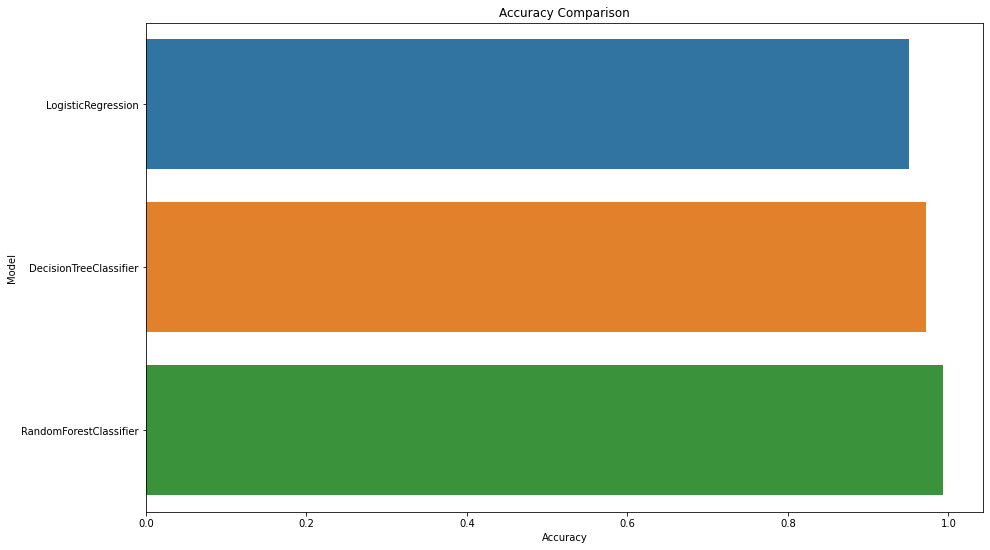

In [ ]:

plt.figure(figsize=(15,9))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = accuracy, y = model_name)
plt.show()